# Chapter 2 - Viscous Fluids

Code used to generate figures and examples from Chapter 6 of [*Introduction to Fluid Dynamics*, by Joseph D. MacMillan](https://josephmacmillan.github.io/IntroductionToFluidDynamics/).  This work is licensed under a [Creative Commons Attribution-ShareAlike 4.0
International License.](https://creativecommons.org/licenses/by-sa/4.0/)

In [2]:
%matplotlib inline

import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

rc('text.latex',preamble='\\usepackage{libertine}\n\\usepackage[libertine]{newtxmath}')
rc('font',**{'family':'serif','serif':['Linux Libertine O']}, size=18)
rc('text', usetex=True)

## Figure 6.4 - Boundary Layer

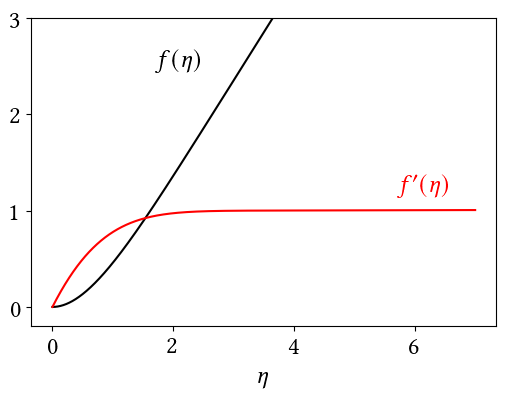

In [3]:
d_eta = 0.001
eta = np.arange(0.0, 7.0, d_eta)

# Here f = f, g = f', and h = f''.
# h0 is the initial condition for f'' -- we have to guess the value that makes the
# value of f' at infinity come out correct (it should be one).  I just did it by brute force.
def run_solution(h0):  

    f = np.zeros(len(eta))
    g = np.zeros(len(eta))
    h = np.zeros(len(eta))
    h[0] = h0

    for i in range(len(eta)-1):
        f[i+1] = f[i] + g[i] * d_eta
        g[i+1] = g[i] + h[i] * d_eta
        h[i+1] = h[i] + (g[i]**2 - f[i] * h[i] - 1.0) * d_eta
    
    return f, g

f, g = run_solution(1.2324)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1,1,1)
ax.plot(eta, f, color='black')
ax.plot(eta, g, color='red')

ax.set_xlabel('$\eta$')
ax.set_ylim(-0.2, 3)
ax.text(5.7, 1.2, "$f\'(\eta)$", color='red')
ax.text(1.7, 2.5, "$f(\eta)$")

plt.savefig('fig_boundary_result1.pdf', bbox_inches='tight')

## Figure 6.5 - Vector Field

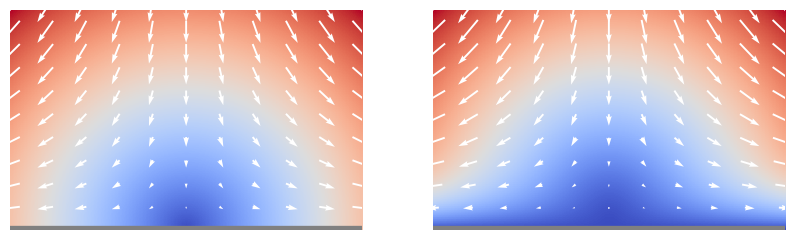

In [4]:
d_eta = 0.001
eta = np.arange(0.0, 7.0, d_eta)

# Here f = f, g = f', and h = f''.
# h0 is the initial condition for f'' -- we have to guess the value that makes the
# value of f' at infinity come out correct (it should be one).  I just did it by brute force.
def run_solution(h0):  

    f = np.zeros(len(eta))
    g = np.zeros(len(eta))
    h = np.zeros(len(eta))
    h[0] = h0

    for i in range(len(eta)-1):
        f[i+1] = f[i] + g[i] * d_eta
        g[i+1] = g[i] + h[i] * d_eta
        h[i+1] = h[i] + (g[i]**2 - f[i] * h[i] - 1.0) * d_eta
    
    return f, g

f, g = run_solution(1.2324)

x = np.linspace(-4, 4, 101)
y = np.linspace(0, 5.0, 101)
x, y = np.meshgrid(x, y)

u = x * np.interp(y, eta, g)
v = -np.interp(y, eta, f)

U = np.sqrt(u**2 + v**2)

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1,2,2)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_aspect('equal')
#ax.quiver(x, y, u, v, pivot='middle')
ax1.imshow(U, extent=[-4, 4, 0, 5], origin='lower', cmap='coolwarm', alpha=1)
#plt.colorbar(shrink=0.5)

ax2 = fig.add_subplot(1,2,1)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_aspect('equal')
#ax.quiver(x, y, x, -y, pivot='middle')
plt.imshow(np.sqrt(x**2 + y**2), extent=[-4, 4, 0, 5], origin='lower', cmap='coolwarm', alpha=1)

x = np.linspace(-4, 4, 11)
y = np.linspace(0, 5.0, 11)
x, y = np.meshgrid(x, y)

u = x * np.interp(y, eta, g)
v = -np.interp(y, eta, f)
ax1.quiver(x, y, u, v, pivot='middle', color="white")
ax2.quiver(x, y, x, -y, pivot='middle', color="white")

ax1.axis('off')
ax2.axis('off')

ax1.axhline(0, lw=6, color='grey')
ax2.axhline(0, lw=6, color='grey')

plt.savefig("fig_boundary_result2.pdf", bbox_inches='tight')

## Fig 6.14 - Polytropes

52753055452.67117


<ipython-input-5-9c5d943111db>:9: RuntimeWarning: invalid value encountered in power
  return [drho, -(2.0 * drho / eta + np.power(rho, n))]


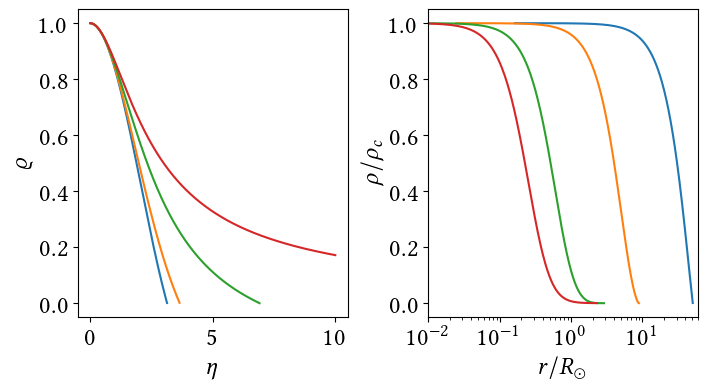

In [5]:
from scipy.integrate import solve_ivp

def lane_emden(x, y, n):
    # for easier thinking
    eta = x
    rho = y[0]
    drho = y[1]
    
    return [drho, -(2.0 * drho / eta + np.power(rho, n))]

def density_zero(x, y, n):
    return y[0]
density_zero.terminal = True

def solve_lane_emden(n, xi = 0.01, xf = 10, dx = 0.01):
    
    sol = solve_ivp(lane_emden, [xi, xf], [1, 0], args=[n], t_eval=np.linspace(xi, xf, 1000), events=density_zero)
    
    return sol.t, sol.y[0]


fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
fig.subplots_adjust(wspace=0.3)

# sun properties
rho_c = 1.622e5 # kg/m^3
G = 6.674e-11 # Nm^2/kg^2
R = 8.314 # J/(mol K)
M = 1.008e-3 # kg/mol
kappa = R/M
beta = 0.5 # radiation/gas fraction
a = 7.566e-16 # J/m^3/K^4
k = np.power( 3*(1-beta) * kappa**4 / a/ beta**4 , 1/3)
print(k)
r_sun = 6.957e8 # m

for n in [1, 1.5, 3, 5]:
    x, f = solve_lane_emden(n)
       
    ax1.plot(x, f)
    ax1.set_xlabel(r"$\eta$")
    ax1.set_ylabel(r"$\varrho$")
    
    lam = np.sqrt( (n+1) * k * np.power(rho_c, (1-n)/n) / (4*np.pi * G) )
    r = lam*x
    rho = rho_c * f**n
    
    ax2.semilogx(r / r_sun, rho / rho_c)
    ax2.set_xlim(0.01, 60)
    ax2.set_xlabel(r"$r/R_\odot$")
    ax2.set_ylabel(r"$\rho/\rho_c$")
    

plt.savefig("fig_polytropes.pdf", bbox_inches='tight')


## Figure 6.6 - Nonlinear Waves

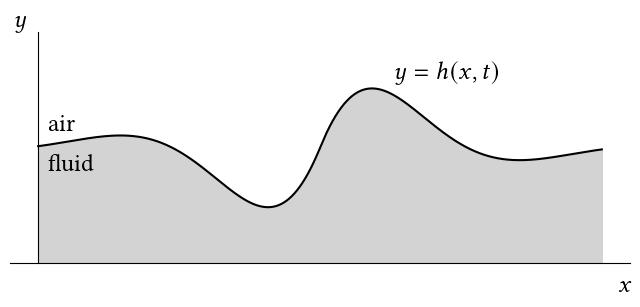

In [6]:
fig = plt.figure(figsize=(8, 3))

ax = fig.add_subplot(1, 1, 1)

x = np.linspace(0, 6, 1000)
y = 0.5* np.exp(-abs(x - 3)) * np.sin(2*(x - 3))

ax.set_ylim(-0.5, 0.5)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position(('axes', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.set_xlabel("$x$", loc="right")
ax.set_ylabel("$y$", loc="top", rotation=0)
ax.plot(x, y, color="black")
ax.fill_between(x, y, y2=-1, color="lightgrey")

ax.text(0.1, 0.08, "air")
ax.text(0.1, -0.1, "fluid")

ax.text(3.8, 0.3, "$y = h(x, t)$")
plt.savefig("fig_nonlinear_wave.pdf", bbox_inches='tight')

## Figure 6.7 - Characteristic Curves

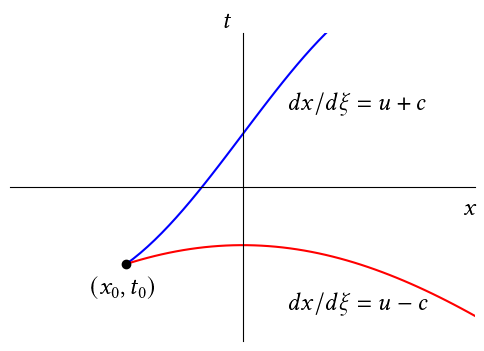

In [7]:
fig = plt.figure(figsize=(6, 4))

ax = fig.add_subplot(1, 1, 1)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.set_xlabel("$x$", loc="right")
ax.set_ylabel("$t$", loc="top", rotation=0)

xp = np.linspace(-0.5, 1)
tp = -0.5 - np.sin(-1) + np.sin(2*xp)
ax.plot(xp, tp, color="blue")

xn = np.linspace(-0.5, 1)
tn = -0.5 - np.cos(-0.5) + np.cos(xp)
ax.plot(xn, tn, color="red")

ax.plot([-0.5], [-0.5], "o", color='black')
ax.text(-0.65, -0.7, "$(x_0, t_0)$")

ax.text(0.2, 0.5, r"$dx/d\xi = u + c$")
ax.text(0.2, -0.8, r"$dx/d\xi = u - c$")

plt.savefig("fig_nonlinear_curves.pdf", bbox_inches='tight')

## Figure 6.8 - Dam Break Set Up

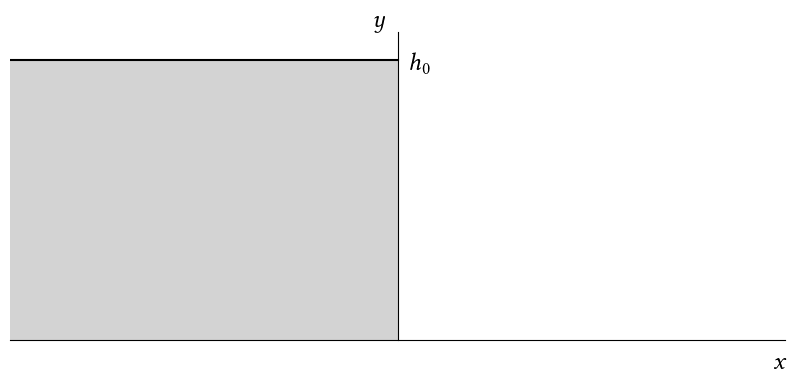

In [8]:
fig = plt.figure(figsize=(10, 4))

ax = fig.add_subplot(1, 1, 1)

h0 = 10
x = np.linspace(-30, 0, 1000)
h = h0 * np.ones(len(x))

ax.set_ylim(0, 11)
ax.set_xlim(-30, 30)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position(('axes', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.set_xlabel("$x$", loc="right")
ax.set_ylabel("$y$", loc="top", rotation=0)
ax.plot(x, h, color="black")
ax.fill_between(x, h, y2=0, color="lightgrey")

ax.text(1, 9.7, "$h_0$")
plt.savefig("fig_dam_start.pdf", bbox_inches='tight')

## Figure 6.10 - Dam Break Profiles

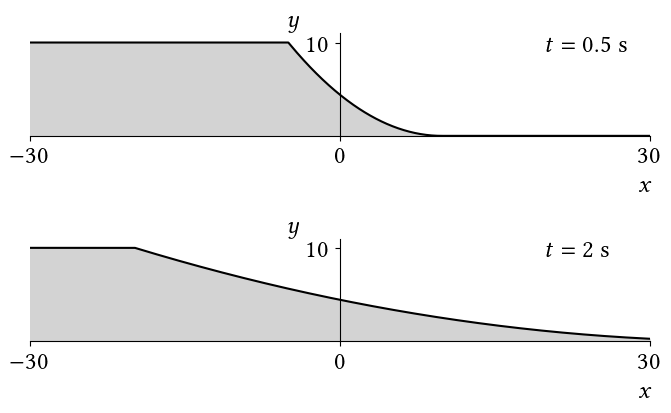

In [9]:
g = 9.8
h0 = 10

def get_height(t, N = 1000):
    
    c0 = np.sqrt(g * h0)
    x = np.linspace(-30, 30, N)
    h = h0 * np.ones(N)
    h[x>-c0*t] = 1/g * np.power(2/3 * c0 - 1/3*x[x>-c0*t]/t, 2)
    h[x>2*c0*t] = 0
   
    return x, h

def plot_one(ax, t):
    
    ax.set_ylim(0, 11)
    ax.set_xlim(-30, 30)

    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position(('axes', 0))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    ax.set_xticks([-30, 0, 30])
    ax.set_yticks([10])
    #ax.set_xticklabels([])
    #ax.set_yticklabels([])

    ax.set_xlabel("$x$", loc="right")
    ax.set_ylabel("$y$", loc="top", rotation=0)

    x, h = get_height(t)
    ax.plot(x, h, color="black")
    ax.fill_between(x, h, y2=0, color="lightgrey")
    ax.text(20, 9, f"$t = {t}$ s")
    
    
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(hspace=1)

ax = fig.add_subplot(2, 1, 1)
plot_one(ax, 0.5)

ax = fig.add_subplot(2, 1, 2)
plot_one(ax, 2)

plt.savefig("fig_dam_heights.pdf", bbox_inches='tight')

## Figure 6.9 - Dam Break Curves

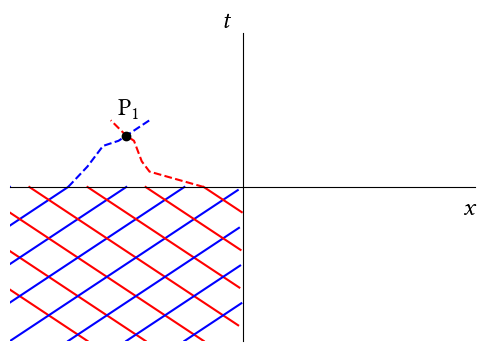

In [10]:
def draw_plot1(ax):

    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)

    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.set_xlabel("$x$", loc="right")
    ax.set_ylabel("$t$", loc="top", rotation=0)

    N = 1000
    c0 = 1
    t = np.linspace(-3, 0)
    def draw_cc(k):

        xp = c0*t + k
        xn = -c0*t + k - 2
        ax.plot(xp[xp<0], t[xp<0], color="blue")
        ax.plot(xn[xn<0], t[xn<0], color="red")

    for k in np.arange(-3, 3, 0.75):
        draw_cc(k)

    ax.plot([-2.25, -2, -1.8, -1.6, -1.5, -1.2], [0, 0.4, 0.8, 0.9, 1, 1.3], "--", color="blue")
    ax.plot([-0.5, -1.2, -1.3, -1.4, -1.5, -1.7], [0, 0.3, 0.5, 0.9, 1, 1.3], "--", color="red")
    ax.plot([-1.5], [1], "o", color="black")
    ax.text(-1.6, 1.4, "P$_1$")
    
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
draw_plot1(ax)

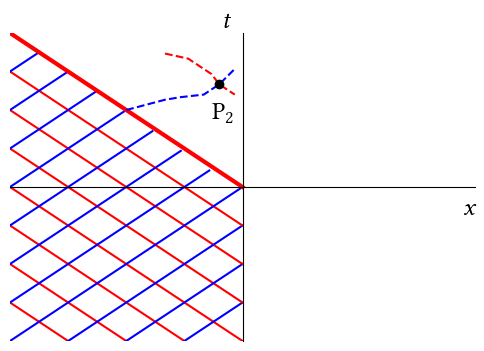

In [11]:
def draw_plot2(ax):

    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)

    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.set_xlabel("$x$", loc="right")
    ax.set_ylabel("$t$", loc="top", rotation=0)

    N = 1000
    c0 = 1
    x = np.linspace(-3, 0)
    def draw_cc(k):

        tp = 1/c0 * x + k
        tn = -1/c0 * x + k
        ax.plot(x[x<=-c0*tp], tp[x<=-c0*tp], color="blue")
        ax.plot(x[x<=-c0*tn], tn[x<=-c0*tn], color="red")

    for k in np.arange(-6, 6, 0.75):
        draw_cc(k)

    tn = -1/c0*x
    ax.plot(x, tn, color="red", lw=3)


    ax.plot([-1.5, -1, -0.8, -0.5, -0.3, -0.1], [1.5, 1.7, 1.75, 1.8, 2, 2.3], "--", color="blue")
    ax.plot([-1, -0.7, -0.5, -0.4, -0.3, -0.1], [2.6, 2.5, 2.3, 2.2, 2, 1.8], "--", color="red")
    ax.plot([-0.3], [2], "o", color="black")
    ax.text(-0.4, 1.3, "P$_2$")
    
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
draw_plot2(ax)

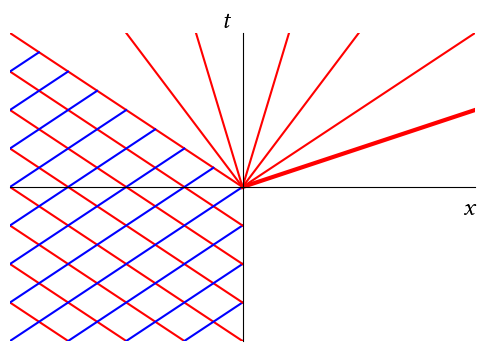

In [12]:
def draw_plot3(ax):

    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)

    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.set_xlabel("$x$", loc="right")
    ax.set_ylabel("$t$", loc="top", rotation=0)

    N = 1000
    c0 = 1
    x = np.linspace(-3, 0, N)
    def draw_cc(k):

        tp = 1/c0 * x + k
        tn = -1/c0 * x + k
        ax.plot(x[x<=-c0*tp], tp[x<=-c0*tp], color="blue")
        ax.plot(x[x<=-c0*tn], tn[x<=-c0*tn], color="red")

    for k in np.arange(-6, 6, 0.75):
        draw_cc(k)

    x = np.linspace(-3, 3, N)

    for k in [-1, -2, -5, 5, 2, 1]:
        tn = k*x
        ax.plot(x[x>-c0*tn], tn[x>-c0*tn], color="red")

    tn = 1/2/c0 * x
    ax.plot(x[x>-c0*tn], tn[x>-c0*tn], color="red", lw=3)
    
    
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
draw_plot3(ax)

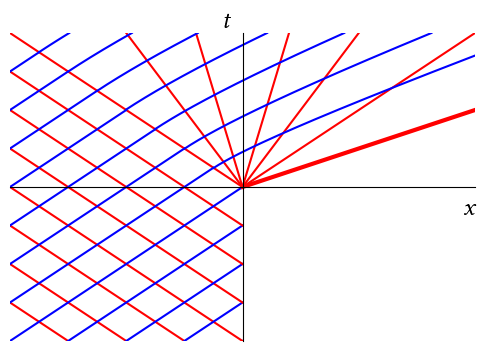

In [13]:
def draw_plot4(ax):
    
    draw_plot3(ax)
    c0 = 1
    t = np.linspace(0, 3, 1000)
    # these values for c1 were found by trial and error to match the other positive curves
    for c1 in [-5.71, -5.15, -4.56, -3.94, -3.25, -2.47, -1.55]:
        xp = c1 * np.power(t, 1/3) + 2*c0*t
        ax.plot(xp[xp>-c0*t], t[xp>-c0*t], color="blue")

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
draw_plot4(ax)

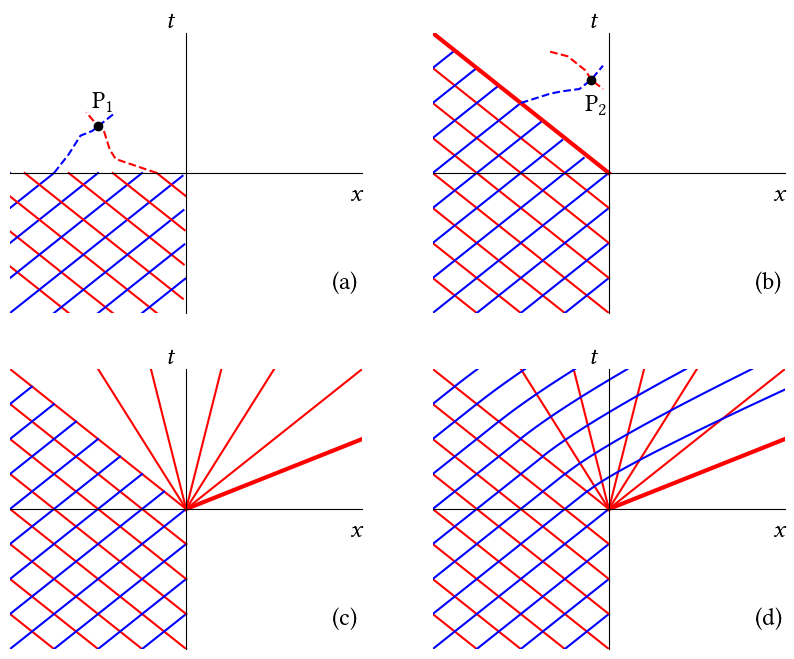

In [14]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(2, 2, 1)
draw_plot1(ax)
ax.text(2.5, -2.5, "(a)")

ax = fig.add_subplot(2, 2, 2)
draw_plot2(ax)
ax.text(2.5, -2.5, "(b)")

ax = fig.add_subplot(2, 2, 3)
draw_plot3(ax)
ax.text(2.5, -2.5, "(c)")

ax = fig.add_subplot(2, 2, 4)
draw_plot4(ax)
ax.text(2.5, -2.5, "(d)")


plt.savefig("fig_char_curves.pdf", bbox_inches='tight')

## Figure 6.12 - Ideal Flow About a Sphere

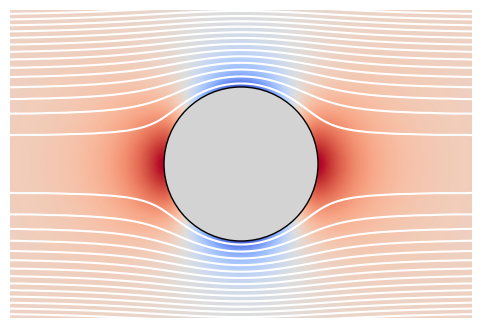

In [37]:
U = 1.0
a = 1.0
mu = 1.0

r = np.linspace(a, 5.0, 145)
angles = np.linspace(0, 2*np.pi, 145)
r, angles = np.meshgrid(r, angles)
z = r*np.cos(angles)
x = r*np.sin(angles)

psi = 0.5 * U * ( r**2 - a**3 / r) * np.sin(angles)**2
u_r = U * (1 - a**3 / r**3) * np.cos(angles)
u_theta = -U * (1 + a**3 / 2 / r**3) * np.sin(angles)
u2 = u_theta**2 + u_r**2
p = -0.5 * u2

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.axis('off')
ax.set_aspect('equal')
ax.set_xlim(-3, 3)
ax.set_ylim(-2, 2)

levs = np.linspace(-2, 2, 30)
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
ax.contourf(z, x, p, cmap = 'coolwarm', levels = 500)
ax.contour(z, x, psi, colors='white', levels=levs)
circ = plt.Circle((0,0),radius=a,fc='lightgrey', fill=True, alpha=1, zorder=2, color="black")
ax.add_patch(circ)

plt.savefig("fig_sphere_lines.pdf", bbox_inches='tight')

## Figure 6.13 - Viscous Flow Past a Sphere

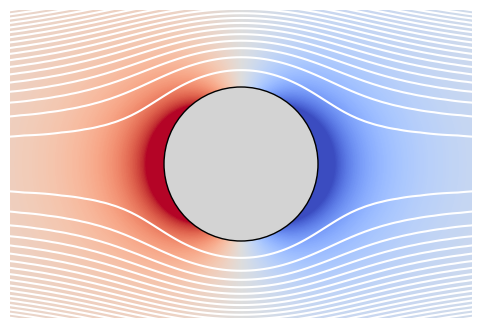

In [2]:
U = 1.0
a = 1.0
mu = 1.0

r = np.linspace(a, 5.0, 145)
angles = np.linspace(0, 2*np.pi, 145)
r, angles = np.meshgrid(r, angles)
z = r*np.cos(angles)
x = r*np.sin(angles)

psi = U * (a**3 / 4 / r - 3*a / 4 * r + 0.5 * r**2) * np.sin(angles)**2
p = -1.5 * mu * U * a / r**2 * np.cos(angles)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.axis('off')
ax.set_aspect('equal')
ax.set_xlim(-3, 3)
ax.set_ylim(-2, 2)

levs = np.linspace(-2, 2, 60)
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
ax.contour(z, x, psi, colors='white', levels=levs)
ax.contourf(z, x, p, cmap = 'coolwarm', levels = 500, vmin = -1, vmax = 1)
circ = plt.Circle((0,0),radius=a,fc='lightgrey', fill=True, alpha=1, zorder=2, color="black")
ax.add_patch(circ)

plt.savefig("fig_sphere_viscous_lines.pdf", bbox_inches='tight')

## Figure 6.15

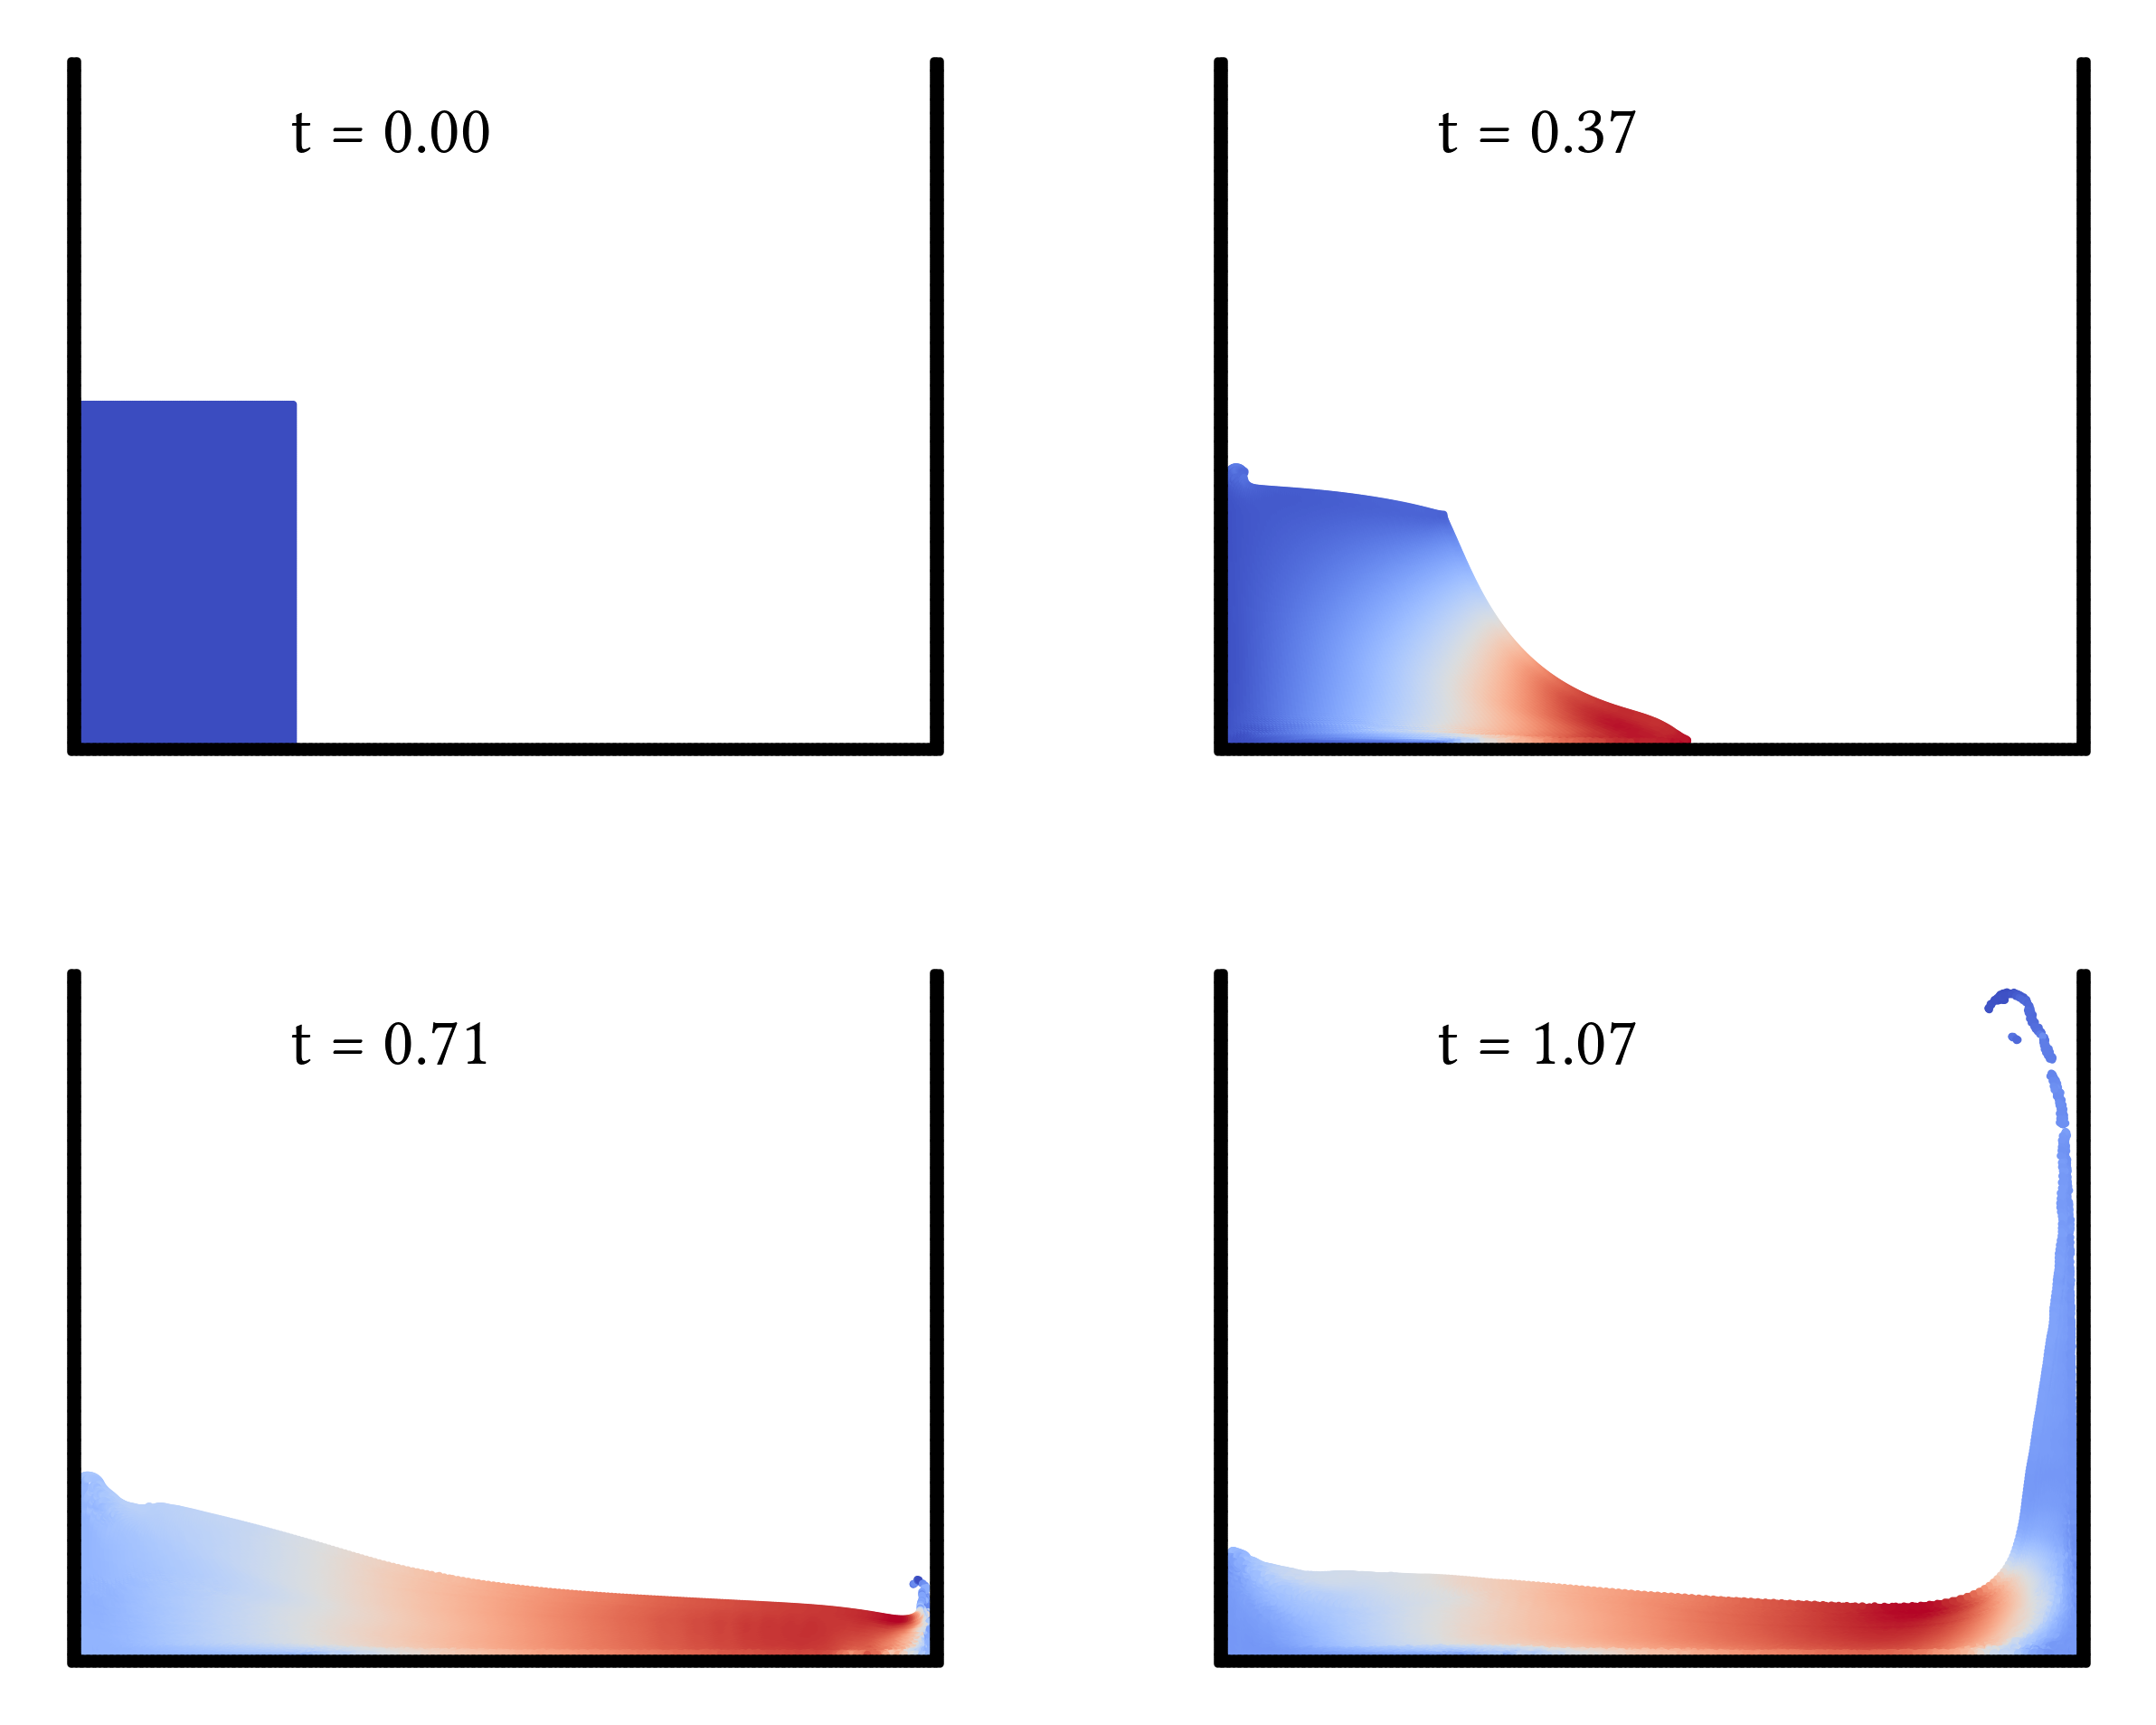

In [4]:
import h5py

def get_fluid(name):


    f = h5py.File(f'{name}.hdf5', 'r')
    fluid = f['particles']['fluid']['arrays']
    x = fluid['x'][:]
    y = fluid['y'][:]
    p = fluid['p'][:]
    u = fluid['u'][:]
    v = fluid['v'][:]
    rho = fluid['rho'][:]
    t = f['solver_data'].attrs['t']

    return x, y, u, t

def get_boundary(name):
    f = h5py.File(f'{name}.hdf5', 'r')
    boundary = f['particles']['boundary']['arrays']
    x = boundary['x'][:]
    y = boundary['y'][:]

    return x, y

fig = plt.figure(figsize=(10,8), dpi=300)

i = 1
for n in ['my_dam_break_00000', 'my_dam_break_04000', 'my_dam_break_08000', 'my_dam_break_12000']:
    ax =  fig.add_subplot(2, 2, i)
    ax.axis('off')
    bx, by = get_boundary(n)
    
    x, y, c, t = get_fluid(n)
    ax.scatter(x, y, c = c, cmap='coolwarm', s=1, alpha=1)
    ax.scatter(bx, by, c='black', s=1)
    ax.text(1, 3.5, f't = {t:.2f}')
    i += 1
    
plt.savefig("fig_sph_dam.png", bbox_inches='tight')